Path Finder for connected and independent q-incomplete graph partitinos

In [109]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import more_itertools

In [110]:
n = 6
k = 3
G = nx.path_graph(n)

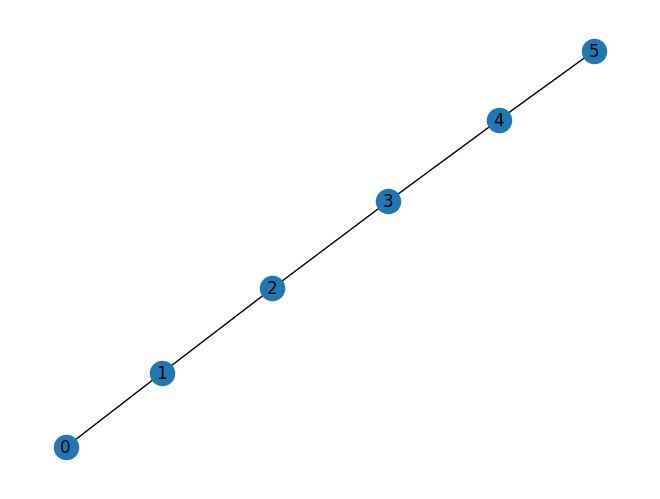

In [111]:
nx.draw(G, labels={i: i for i in G.nodes()})

In [112]:
vertices = tuple(range(n))
print (vertices)

s1 = more_itertools.set_partitions(vertices, k)
for p in s1:
    print (p)

(0, 1, 2, 3, 4, 5)
[[0], [1], [2, 3, 4, 5]]
[[0], [1, 2], [3, 4, 5]]
[[0], [2], [1, 3, 4, 5]]
[[0], [1, 2, 3], [4, 5]]
[[0], [2, 3], [1, 4, 5]]
[[0], [1, 3], [2, 4, 5]]
[[0], [3], [1, 2, 4, 5]]
[[0], [1, 2, 3, 4], [5]]
[[0], [2, 3, 4], [1, 5]]
[[0], [1, 3, 4], [2, 5]]
[[0], [3, 4], [1, 2, 5]]
[[0], [1, 2, 4], [3, 5]]
[[0], [2, 4], [1, 3, 5]]
[[0], [1, 4], [2, 3, 5]]
[[0], [4], [1, 2, 3, 5]]
[[0, 1], [2], [3, 4, 5]]
[[1], [0, 2], [3, 4, 5]]
[[1], [2], [0, 3, 4, 5]]
[[0, 1], [2, 3], [4, 5]]
[[1], [0, 2, 3], [4, 5]]
[[1], [2, 3], [0, 4, 5]]
[[0, 1], [3], [2, 4, 5]]
[[1], [0, 3], [2, 4, 5]]
[[1], [3], [0, 2, 4, 5]]
[[0, 1], [2, 3, 4], [5]]
[[1], [0, 2, 3, 4], [5]]
[[1], [2, 3, 4], [0, 5]]
[[0, 1], [3, 4], [2, 5]]
[[1], [0, 3, 4], [2, 5]]
[[1], [3, 4], [0, 2, 5]]
[[0, 1], [2, 4], [3, 5]]
[[1], [0, 2, 4], [3, 5]]
[[1], [2, 4], [0, 3, 5]]
[[0, 1], [4], [2, 3, 5]]
[[1], [0, 4], [2, 3, 5]]
[[1], [4], [0, 2, 3, 5]]
[[0, 1, 2], [3], [4, 5]]
[[1, 2], [0, 3], [4, 5]]
[[1, 2], [3], [0, 4, 5]]
[[0, 2

In [113]:
def is_connected(G, partition):
    for block in partition:
        if not nx.is_connected(G.subgraph(block)):
            return False
    return True

def is_q_complete(G, partition,):
    Q = nx.quotient_graph(G, partition)
    n = len(Q.nodes)
    return G.number_of_edges() == n * (n - 1) / 2

def is_independent(G, partition):
    for block in partition:
        if not nx.is_empty(G.subgraph(block)):
            return False
    return True

In [114]:
def render_graph(G, partition):
    
    colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'black']
    color_map = [0] * G.number_of_nodes()
    # set the colors
    for i, block in enumerate(partition):
        for v in block:
            color_map[v] = colors[i]
            
    nx.draw(G, labels={i: i for i in G.nodes()}, node_color=color_map)
    plt.show()
    plt.close()

[{0}, {1}, {2, 3, 4, 5}]


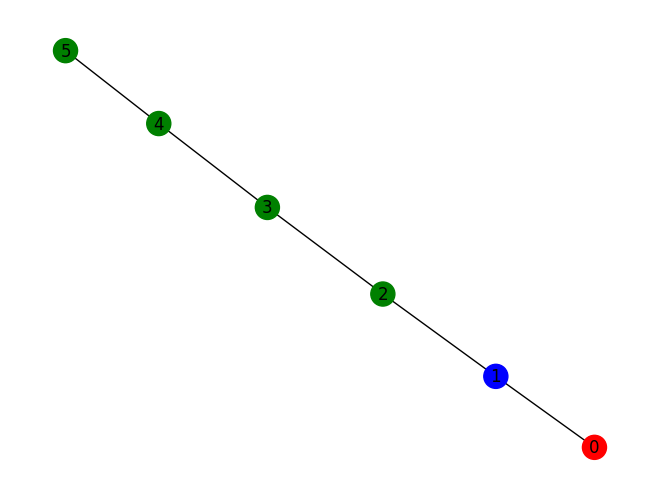

[{0}, {1, 2}, {3, 4, 5}]


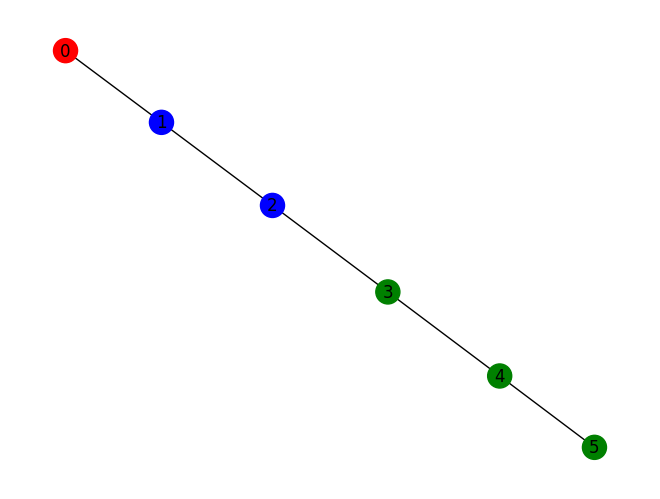

[{0}, {1, 2, 3}, {4, 5}]


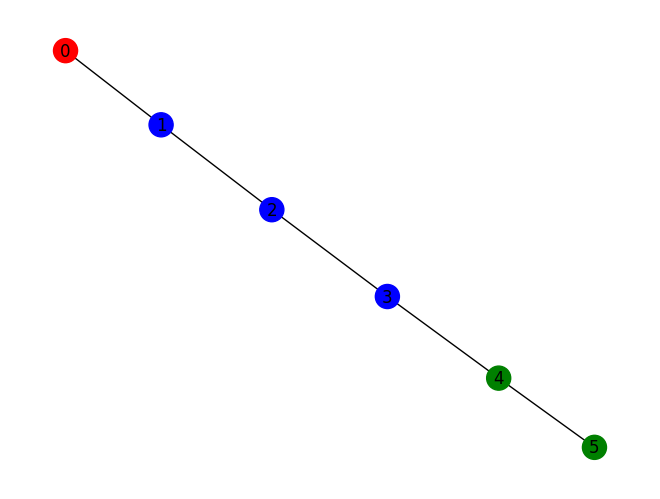

[{0}, {1, 2, 3, 4}, {5}]


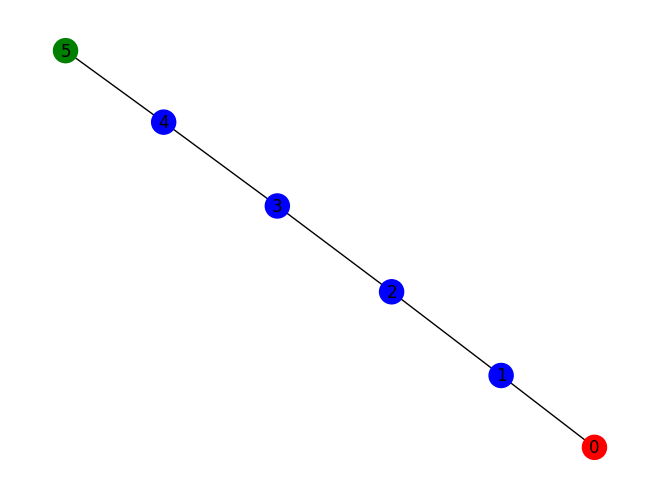

[{0, 1}, {2}, {3, 4, 5}]


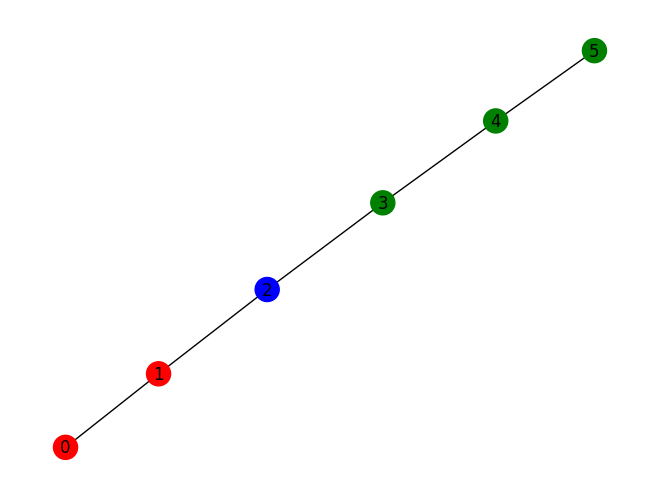

[{0, 1}, {2, 3}, {4, 5}]


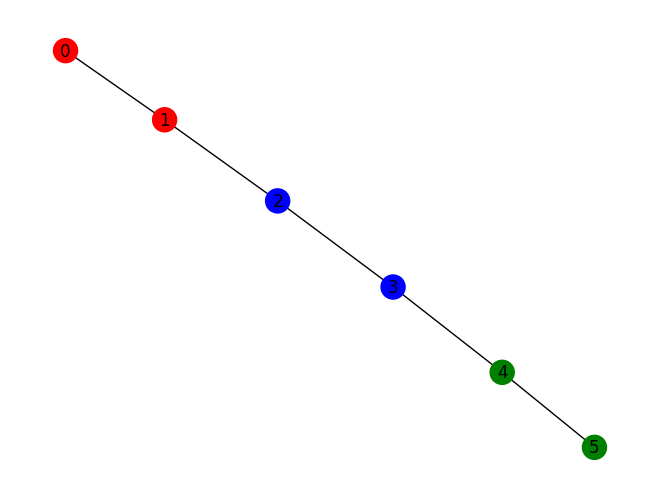

[{0, 1}, {2, 3, 4}, {5}]


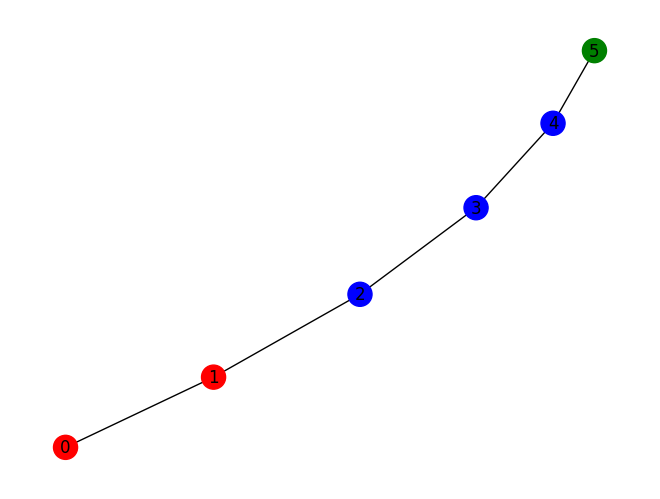

[{0, 1, 2}, {3}, {4, 5}]


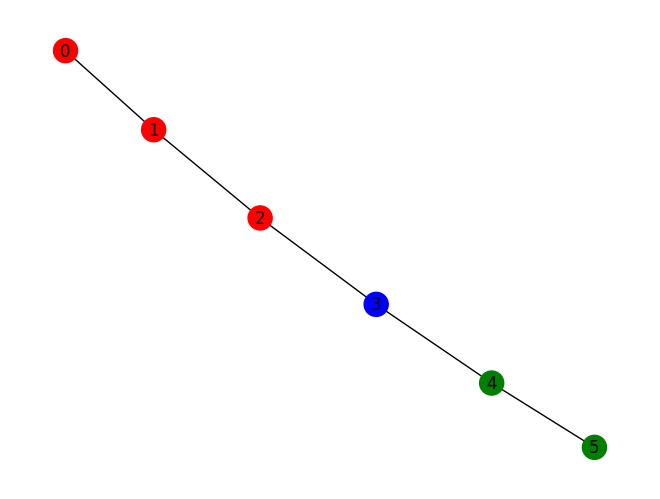

[{0, 1, 2}, {3, 4}, {5}]


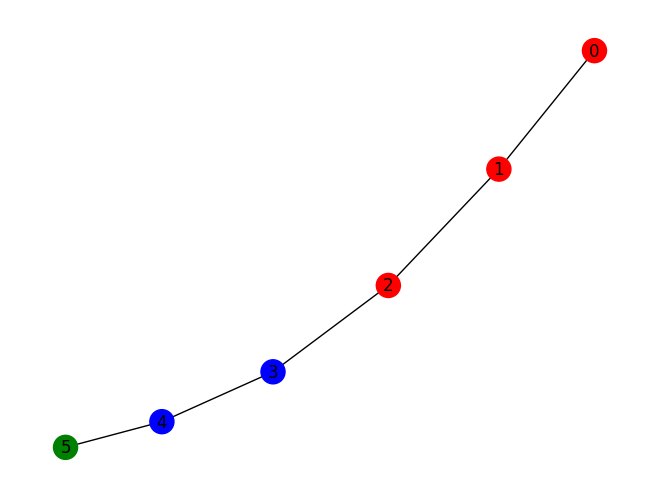

[{0, 1, 2, 3}, {4}, {5}]


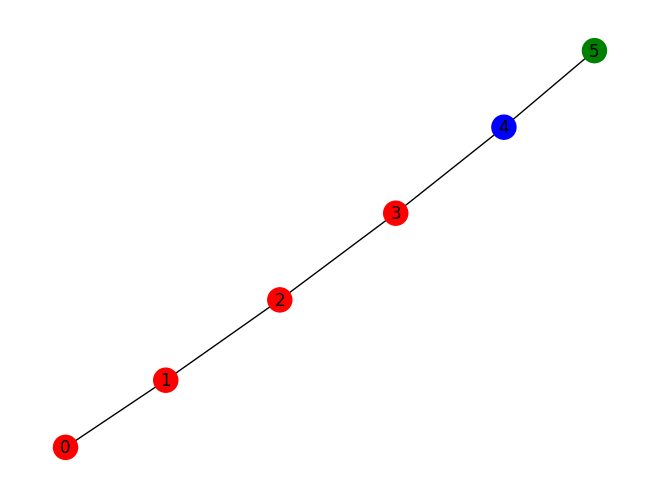

In [115]:
s1 = more_itertools.set_partitions(vertices, k)
s1 = [[set(p) for p in part] for part in s1 if is_connected(G, part)]
for partition in s1:
    print (partition)
    render_graph(G, partition)
    

In [ ]:
def can_transform_by_one_move(p1, p2):
    """
    Check if partition p1 can be transformed into p2 by moving one element.
    
    Args:
        p1: List of sets representing the first partition
        p2: List of sets representing the second partition
        
    Returns:
        bool: True if transformation is possible with one move
    """
    # Check if the number of blocks is the same
    if len(p1) != len(p2):
        return False
    
    
    for ba, bb in zip(p1, p2):
        
        # If the blocks are the same, move to the next pair
        if ba == bb:
            continue
        
        # check if one block is a subset of the other (this is required)
        if ba.issubset(bb) or bb.issubset(ba):
            continue
        
        # check if the symmetric difference of the two blocks is a single element
        if len(ba.symmetric_difference(bb)) == 1:
            continue
        
        # If none of the conditions are met, return False
        return False
    
    # if all blocks are equal now, we need to return false
    all_equal = all(ba == bb for ba, bb in zip(p1, p2))

    return not all_equal

# Example usage:
p1 = [{1, 2}, {3, 4}, {5, 6}]
p2 = [{1, 2}, {3, 4, 5}, {6}]
print(can_transform_by_one_move(p1, p2))  # True

p1 = [{1, 2}, {3, 4}, {5, 6}]
p2 = [{1, 2, 3}, {4}, {5, 6}]
print(can_transform_by_one_move(p1, p2))  # True

p1 = [{1, 2}, {3, 4}, {5, 6}]
p2 = [{1, 2, 3}, {4, 5}, {6}]
print(can_transform_by_one_move(p1, p2))  # False (requires two moves)


True
True
False


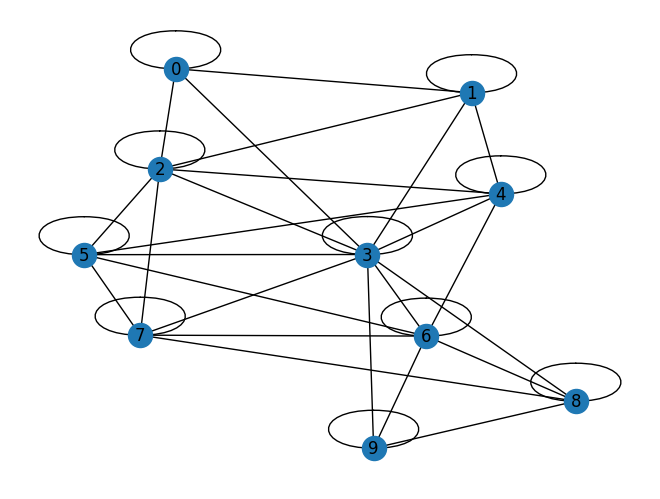

In [118]:
# let's create a graph that represents all connected partitions with an edge between them if 
# they can be transformed by one move

Gr = nx.Graph()
for e1, p1 in enumerate(s1):
    for e2, p2 in enumerate(s1):
        if can_transform_by_one_move(p1, p2):
            Gr.add_edge(e1, e2)
                
nx.draw(Gr, with_labels=True)